In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

2024-05-06 14:56:33.881229: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-06 14:56:45.596507: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
model_path = '/home/aman/Desktop/AmanR/work/Projects/DataScienceProjects/Potato Disease Prediction Web App/model_1/saved_model.pb'
loaded_model = tf.keras.models.load_model(model_path)

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
n_classes = 3
EPOCHS = 50

In [6]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage/Potato",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [7]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [8]:
type(class_names)

list

In [9]:
len(dataset)

68

2024-05-03 19:33:54.959453: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


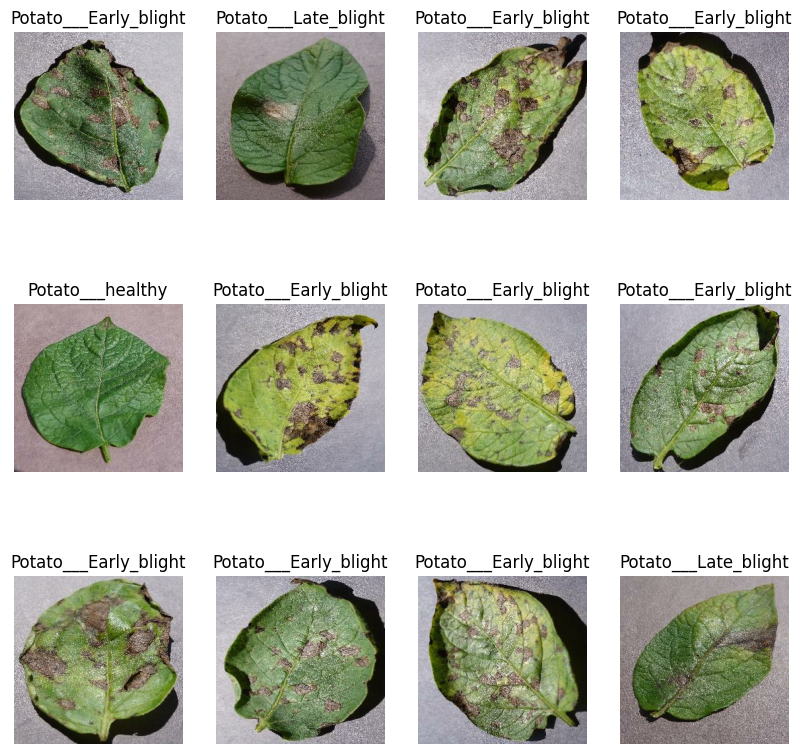

In [10]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype(int))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [11]:
def get_dataset_partition_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, train_size=54, shuffle=True, shuffle_size=10000):

    ds_size = len(ds)

    if shuffle:
        ds  = ds.shuffle(shuffle_size, seed=12)

    tarin_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(tarin_size)

    val_ds = ds.skip(tarin_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [12]:
train_ds, val_ds, test_ds = get_dataset_partition_tf(dataset)

In [13]:
print(len(train_ds), len(val_ds), len(test_ds))

54 6 8


In [14]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [15]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [16]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal_and_vertical'),
    layers.RandomRotation(0.2)
])

In [14]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3), input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3), input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3), input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3), input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3), input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')

])

model.build(input_shape = (32,256,256,3))

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 32)          0         
 g2D)                                                 

In [16]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [17]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 157s 192ms/step - loss: 0.7089 - accuracy: 0.6834 - val_loss: 0.4899 - val_accuracy: 0.8177
Epoch 2/50
54/54 [==============================] - 3s 49ms/step - loss: 0.4710 - accuracy: 0.8166 - val_loss: 0.3506 - val_accuracy: 0.8646
Epoch 3/50
54/54 [==============================] - 3s 49ms/step - loss: 0.3096 - accuracy: 0.8779 - val_loss: 0.2158 - val_accuracy: 0.9219
Epoch 4/50
54/54 [==============================] - 3s 50ms/step - loss: 0.2154 - accuracy: 0.9155 - val_loss: 0.1538 - val_accuracy: 0.9531
Epoch 5/50
54/54 [==============================] - 3s 49ms/step - loss: 0.2238 - accuracy: 0.9068 - val_loss: 0.2570 - val_accuracy: 0.8958
Epoch 6/50
54/54 [==============================] - 3s 50ms/step - loss: 0.1413 - accuracy: 0.9439 - val_loss: 0.4340 - val_accuracy: 0.8542
Epoch 7/50
54/54 [==============================] - 3s 53ms/step - loss: 0.1762 - accuracy: 0.9369 - val_loss: 0.1894 - val_accuracy: 0.9115
Epoch 8/50

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                 

In [19]:
scores = model.evaluate(test_ds)
scores

8/8 [==============================] - 7s 22ms/step - loss: 0.1377 - accuracy: 0.9492


[0.13772839307785034, 0.94921875]

In [20]:
history

In [21]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [22]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

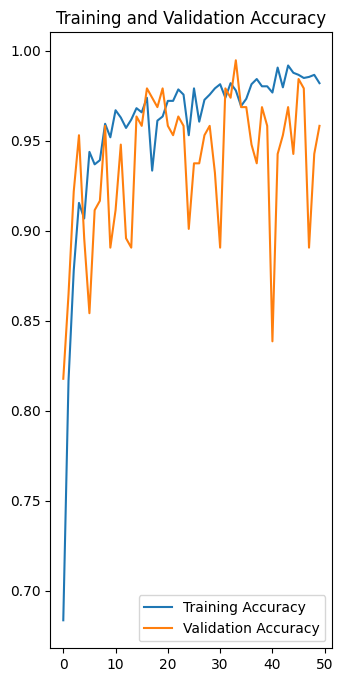

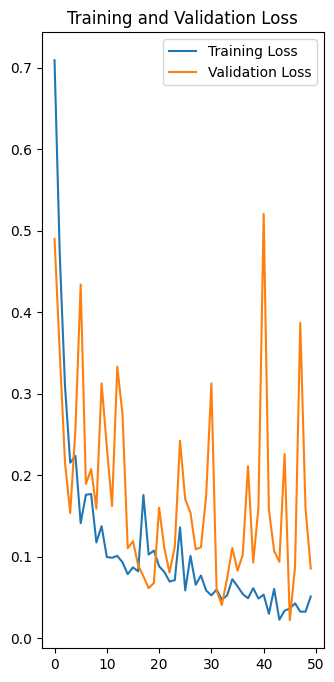

In [24]:
# accuracy chart
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
# loss chart
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

In [21]:
model = tf.keras.models.load_model('model_1')

ValueError: File format not supported: filepath=model_1. Keras 3 only supports V3 `.keras` files and legacy H5 format files (`.h5` extension). Note that the legacy SavedModel format is not supported by `load_model()` in Keras 3. In order to reload a TensorFlow SavedModel as an inference-only layer in Keras 3, use `keras.layers.TFSMLayer(model_1, call_endpoint='serving_default')` (note that your `call_endpoint` might have a different name).

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 0s 130ms/step
predicted label: Potato___Late_blight


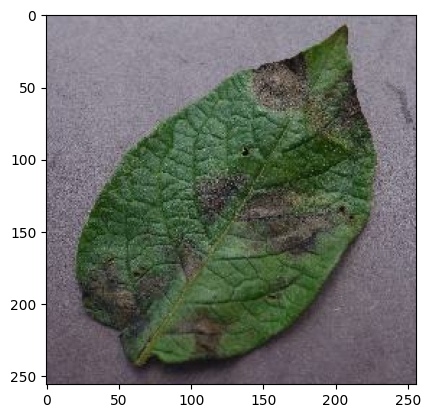

In [25]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

  first_image = images_batch[0].numpy().astype('int')
  first_label = labels_batch[0].numpy()

  print('first image to predict')
  plt.imshow(first_image)
  print('actual label:', class_names[first_label])

  batch_prediction = model.predict(images_batch)
  print('predicted label:', class_names[np.argmax(batch_prediction[0])])

In [29]:
model.save('potato_classification_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
from tensorflow.keras.models import load_model
model = load_model('potato_classification_model.h5')

TypeError: unsupported operand type(s) for %: 'NoneType' and 'int'

In [6]:
def predict(model, img):
  img_array = tf.keras.preprocessing.image.img_to_array(img[i].numpy())
  img_array = tf.expand_dims(img_array, 0) #create a batch

  predictions = model.predict(img_array)

  predicted_class = class_names[np.argmax(predictions[0])]
  confidence = round(100 * (np.max(predictions[0])),2)
  return predicted_class, confidence


In [ ]:
for images, labels in test_ds.take(1):
  for i in range(9):
    plt.subplot(3,3, i+1)
    plt.imshow(images[i].numpy().astype('int'))

    predicted_class, confidence = predict(model, images[i])
    actual_class = class_names[labels[i]]

    plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}.")

    plt.axis('off')

  print(images.shape)

In [ ]:
model.layers[0].get_config()['filters']

In [ ]:
model.summary()